c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


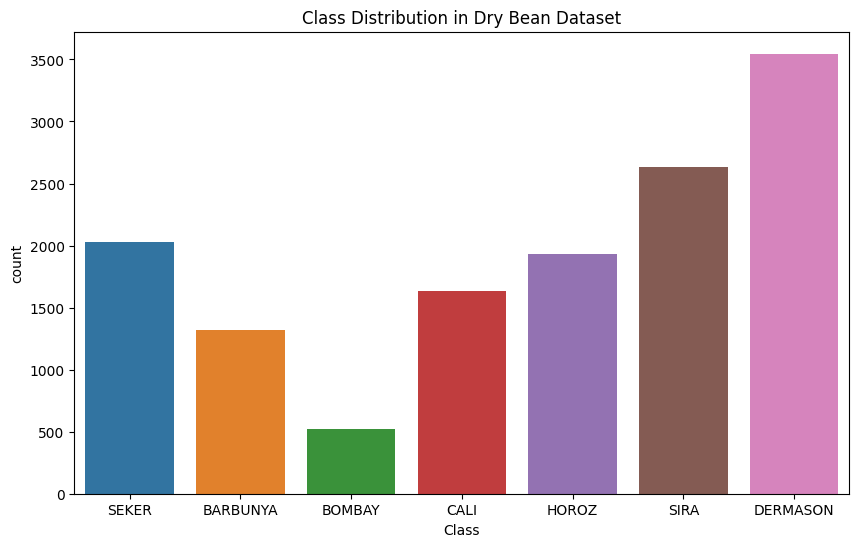

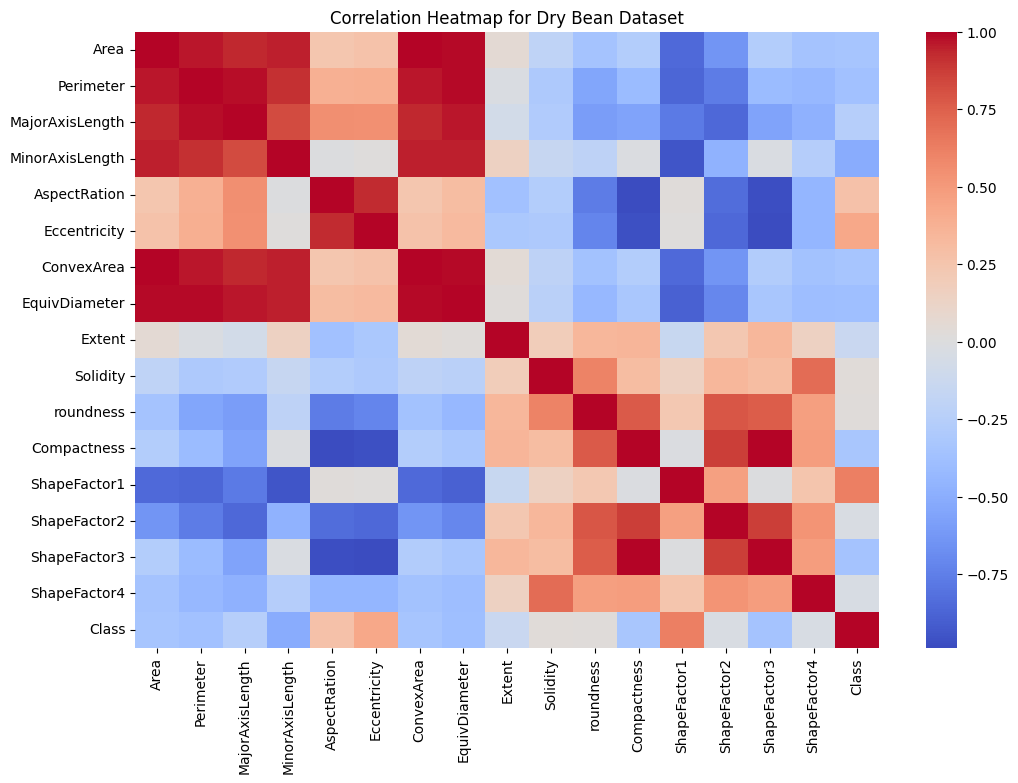

Training time: 492.18 seconds


C:\Users\kulka\AppData\Local\Temp\ipykernel_40648\1796554776.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[node['index']] < node['value']:


Prediction time: 0.47 seconds
Accuracy of Random Forest from scratch: 94.60%


In [6]:


# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution in Dry Bean Dataset')
plt.show()



# Helper Functions
def gini_index(groups, classes):
    n_instances = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = group['Class'].value_counts().get(class_val, 0) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def split_dataset(index, value, dataset):
    left = dataset[dataset.iloc[:, index] < value]
    right = dataset[dataset.iloc[:, index] >= value]
    return left, right

def get_best_split(dataset, n_features):
    class_values = dataset['Class'].unique()
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = random.sample(range(dataset.shape[1]-1), n_features)
    for index in features:
        for value in dataset.iloc[:, index].unique():
            groups = split_dataset(index, value, dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, value, gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

def to_terminal(group):
    return group['Class'].mode().iloc[0]

def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    if left.empty or right.empty:
        node['left'] = node['right'] = to_terminal(pd.concat([left, right]))
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_best_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_best_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)

def build_tree(train, max_depth, min_size, n_features):
    root = get_best_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root

def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

def subsample(dataset, ratio):
    return dataset.sample(frac=ratio, replace=True)

def random_forest(train, max_depth, min_size, sample_size, n_trees, n_features):
    trees = []
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    return trees

def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

def accuracy_metric(actual, predicted):
    correct = sum(1 for i in range(len(actual)) if actual[i] == predicted[i])
    return correct / float(len(actual)) * 100.0

# Map the 'Class' column to numerical values
class_mapping = {
    'SEKER': 1,
    'BARBUNYA': 2,
    'BOMBAY': 3,
    'CALI': 4,
    'HOROZ': 5,
    'SIRA': 6,
    'DERMASON': 7
}
df['Class'] = df['Class'].map(class_mapping)

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap for Dry Bean Dataset')
plt.show()

df = df.iloc[1:5000] # execution time 
# Prepare dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Random Forest parameters
n_trees = 8
max_depth = 4
min_size = 1
sample_size = 0.632
n_features = 4

# Training
start_time = time.time()
trees = random_forest(train_data, max_depth, min_size, sample_size, n_trees, n_features)
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Prediction
start_time = time.time()
predictions = [bagging_predict(trees, row) for _, row in test_data.iterrows()]
prediction_time = time.time() - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

# Evaluate the performance
actual = test_data['Class'].tolist()
accuracy = accuracy_metric(actual, predictions)
print(f'Accuracy of Random Forest from scratch: {accuracy:.2f}%')

c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


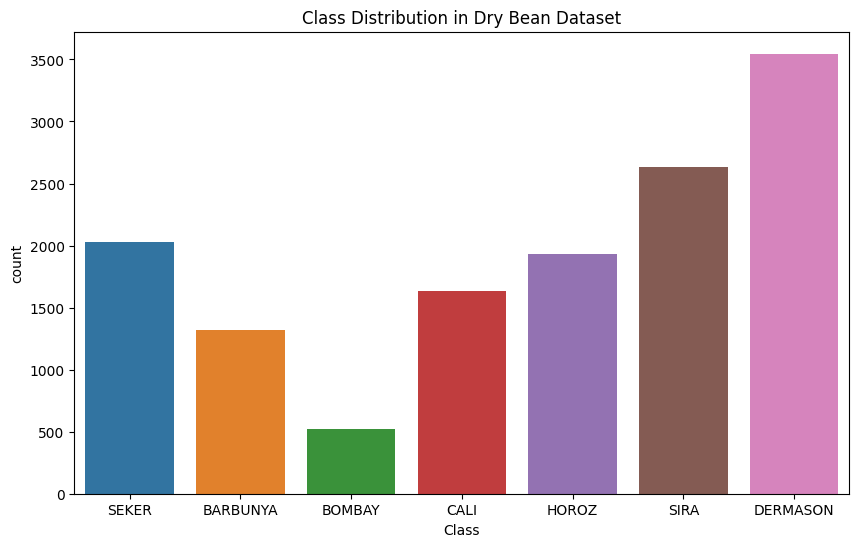

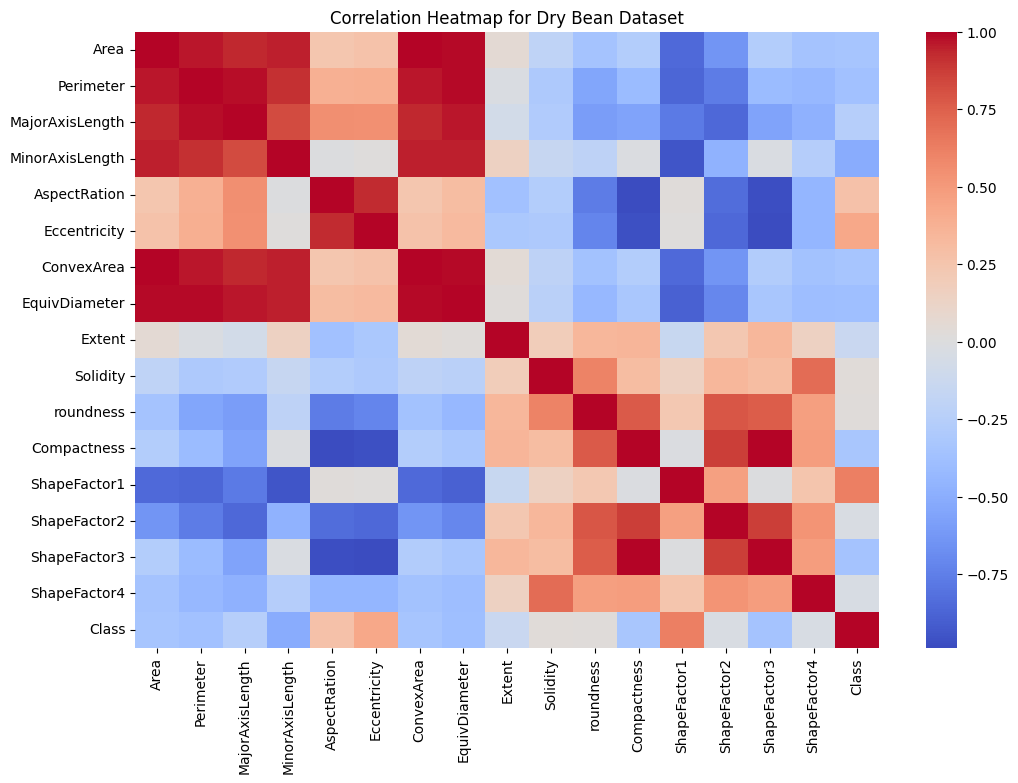

Training time: 2134.80 seconds


C:\Users\kulka\AppData\Local\Temp\ipykernel_40648\725518604.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[node['index']] < node['value']:


Prediction time: 1.26 seconds
Accuracy of Random Forest from scratch: 83.77%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import time

# Load the dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution in Dry Bean Dataset')
plt.show()



# Helper Functions
def gini_index(groups, classes):
    n_instances = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = group['Class'].value_counts().get(class_val, 0) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def split_dataset(index, value, dataset):
    left = dataset[dataset.iloc[:, index] < value]
    right = dataset[dataset.iloc[:, index] >= value]
    return left, right

def get_best_split(dataset, n_features):
    class_values = dataset['Class'].unique()
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = random.sample(range(dataset.shape[1]-1), n_features)
    for index in features:
        for value in dataset.iloc[:, index].unique():
            groups = split_dataset(index, value, dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, value, gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

def to_terminal(group):
    return group['Class'].mode().iloc[0]

def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    if left.empty or right.empty:
        node['left'] = node['right'] = to_terminal(pd.concat([left, right]))
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_best_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_best_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)

def build_tree(train, max_depth, min_size, n_features):
    root = get_best_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root

def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

def subsample(dataset, ratio):
    return dataset.sample(frac=ratio, replace=True)

def random_forest(train, max_depth, min_size, sample_size, n_trees, n_features):
    trees = []
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    return trees

def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

def accuracy_metric(actual, predicted):
    correct = sum(1 for i in range(len(actual)) if actual[i] == predicted[i])
    return correct / float(len(actual)) * 100.0

# Map the 'Class' column to numerical values
class_mapping = {
    'SEKER': 1,
    'BARBUNYA': 2,
    'BOMBAY': 3,
    'CALI': 4,
    'HOROZ': 5,
    'SIRA': 6,
    'DERMASON': 7
}
df['Class'] = df['Class'].map(class_mapping)

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap for Dry Bean Dataset')
plt.show()

# execution time 
# Prepare dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Random Forest parameters
n_trees = 8
max_depth = 4
min_size = 1
sample_size = 0.632
n_features = 4

# Training
start_time = time.time()
trees = random_forest(train_data, max_depth, min_size, sample_size, n_trees, n_features)
training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

# Prediction
start_time = time.time()
predictions = [bagging_predict(trees, row) for _, row in test_data.iterrows()]
prediction_time = time.time() - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

# Evaluate the performance
actual = test_data['Class'].tolist()
accuracy = accuracy_metric(actual, predictions)
print(f'Accuracy of Random Forest from scratch: {accuracy:.2f}%')

In [8]:
def predict_with_details(node, row):
    path = []
    current_node = node
    while isinstance(current_node, dict):
        feature_index = current_node['index']
        feature_value = row[feature_index]
        threshold = current_node['value']
        path.append(f"Feature {feature_index}: {feature_value} < {threshold}")
        if feature_value < threshold:
            path.append("Going left")
            current_node = current_node['left']
        else:
            path.append("Going right")
            current_node = current_node['right']
    return current_node, path

def bagging_predict_with_details(trees, row):
    predictions = []
    paths = []
    for i, tree in enumerate(trees):
        prediction, path = predict_with_details(tree, row)
        predictions.append(prediction)
        paths.append(f"Tree {i+1}:\n" + "\n".join(path) + f"\nPrediction: {prediction}")
    final_prediction = max(set(predictions), key=predictions.count)
    return final_prediction, predictions, paths

In [9]:


# TEST
single_entry = test_data.iloc[0]


final_prediction, individual_predictions, decision_paths = bagging_predict_with_details(trees, single_entry)

# Printing
print(f"Input data: {single_entry.to_dict()}")
print(f"\nFinal prediction: {final_prediction}")
print(f"\nIndividual tree predictions: {individual_predictions}")
print("\nDecision paths for each tree:")
for path in decision_paths:
    print(f"\n{path}")

# Reverse Mapping
reverse_class_mapping = {v: k for k, v in class_mapping.items()}
predicted_class = reverse_class_mapping[final_prediction]
print(f"\nPredicted class: {predicted_class}")

Input data: {'Area': 42339.0, 'Perimeter': 741.2259999999999, 'MajorAxisLength': 260.19933054636994, 'MinorAxisLength': 207.30639412352278, 'AspectRation': 1.2551437771443321, 'Eccentricity': 0.6043466663528361, 'ConvexArea': 42676.0, 'EquivDiameter': 232.18029435019253, 'Extent': 0.7712021857923498, 'Solidity': 0.9921032899053333, 'roundness': 0.968387491136667, 'Compactness': 0.8923170319564517, 'ShapeFactor1': 0.006145618237236825, 'ShapeFactor2': 0.0024033779461940423, 'ShapeFactor3': 0.7962296855195715, 'ShapeFactor4': 0.9993827349574785, 'Class': 1.0}

Final prediction: 1

Individual tree predictions: [1, 1, 1, 1, 1, 1, 1, 1]

Decision paths for each tree:

Tree 1:
Feature 7: 232.18029435019253 < 223.74652099963893
Going right
Feature 14: 0.7962296855195715 < 0.5283789058381151
Going right
Feature 6: 42676.0 < 56388
Going left
Feature 11: 0.8923170319564517 < 0.849330685447617
Going right
Prediction: 1

Tree 2:
Feature 2: 260.19933054636994 < 281.1481581090238
Going left
Feature 

C:\Users\kulka\AppData\Local\Temp\ipykernel_40648\1039409276.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = row[feature_index]


Input data:
Bean Characteristics:
- Area: 42339.0 square pixels
- Perimeter: 741.23 pixels
- Major Axis Length: 260.20 pixels
- Minor Axis Length: 207.31 pixels
- Aspect Ratio: 1.26
- Eccentricity: 0.60
- Convex Area: 42676.0 square pixels
- Equivalent Diameter: 232.18 pixels
- Extent: 0.77
- Solidity: 0.99
- Roundness: 0.97
- Compactness: 0.89
- Shape Factor 1: 0.0061
- Shape Factor 2: 0.0024
- Shape Factor 3: 0.80
- Shape Factor 4: 0.99

Final prediction: SEKER (Class 1)

Decision process for each tree:

Tree 1:
1. The bean's Equivalent Diameter (232.18) is larger than 223.75
2. Its Shape Factor 3 (0.80) is larger than 0.53
3. Its Convex Area (42676.0) is smaller than 56388
4. Its Compactness (0.89) is larger than 0.85
Conclusion: The bean is classified as SEKER

Tree 2:
1. The bean's Major Axis Length (260.20) is smaller than 281.15
2. Its Shape Factor 1 (0.0061) is smaller than 0.0068
3. Its Compactness (0.89) is larger than 0.85
4. Its Eccentricity (0.60) is smaller than 0.65
Conclusion: The bean is classified as SEKER

Tree 3:
1. The bean's Major Axis Length (260.20) is smaller than 280.61
2. Its Minor Axis Length (207.31) is larger than 186.96
3. Its Roundness (0.97) is larger than 0.92
4. Its Aspect Ratio (1.26) is smaller than 1.37
Conclusion: The bean is classified as SEKER

Tree 4:
1. The bean's Major Axis Length (260.20) is smaller than 277.53
2. Its Shape Factor 1 (0.0061) is smaller than 0.0068
3. Its Aspect Ratio (1.26) is smaller than 1.36
4. Its Shape Factor 4 (0.99) is larger than 0.995
Conclusion: The bean is classified as SEKER

Tree 5:
1. The bean's Shape Factor 1 (0.0061) is smaller than 0.0071
2. Its Aspect Ratio (1.26) is smaller than 1.35
3. Its Equivalent Diameter (232.18) is smaller than 271.31
4. Its Aspect Ratio (1.26) is smaller than 1.32
Conclusion: The bean is classified as SEKER

Tree 6:
1. The bean's Minor Axis Length (207.31) is larger than 181.43
2. Its Convex Area (42676.0) is smaller than 54215
3. Its Shape Factor 3 (0.80) is larger than 0.73
4. Its Compactness (0.89) is larger than 0.86
Conclusion: The bean is classified as SEKER

Tree 7:
1. The bean's Perimeter (741.23) is smaller than 749.43
2. Its Shape Factor 3 (0.80) is larger than 0.76
3. Its Minor Axis Length (207.31) is larger than 180.44
4. Its Shape Factor 4 (0.99) is larger than 0.997
Conclusion: The bean is classified as SEKER

Tree 8:
1. The bean's Convex Area (42676.0) is larger than 40184
2. Its Compactness (0.89) is larger than 0.72
3. Its Area (42339.0) is smaller than 55676
4. Its Aspect Ratio (1.26) is smaller than 1.39
Conclusion: The bean is classified as SEKER

Overall Summary:
All 8 trees in the Random Forest classified this bean as SEKER (Class 1). The most common deciding factors were:
1. The bean's size (Major Axis Length, Minor Axis Length, Area, Convex Area) being in a specific range.
2. Shape characteristics like Aspect Ratio, Compactness, and various Shape Factors falling within certain ranges.
3. The bean's overall roundness and solidity being high.

These factors consistently indicate that the bean has the typical characteristics of the SEKER variety, such as being relatively large, somewhat elongated but not excessively so, and having a compact, solid shape.

In [21]:
test_data.iloc[89]

Area               70445.000000
Perimeter            998.333000
MajorAxisLength      379.107300
MinorAxisLength      238.971785
AspectRation           1.586410
Eccentricity           0.776308
ConvexArea         71483.000000
EquivDiameter        299.488497
Extent                 0.769722
Solidity               0.985479
roundness              0.888197
Compactness            0.789983
ShapeFactor1           0.005382
ShapeFactor2           0.001293
ShapeFactor3           0.624074
ShapeFactor4           0.990037
Class                  4.000000
Name: 4365, dtype: float64

In [22]:
df.iloc[4365]

Area               70445.000000
Perimeter            998.333000
MajorAxisLength      379.107300
MinorAxisLength      238.971785
AspectRation           1.586410
Eccentricity           0.776308
ConvexArea         71483.000000
EquivDiameter        299.488497
Extent                 0.769722
Solidity               0.985479
roundness              0.888197
Compactness            0.789983
ShapeFactor1           0.005382
ShapeFactor2           0.001293
ShapeFactor3           0.624074
ShapeFactor4           0.990037
Class                  4.000000
Name: 4365, dtype: float64

In [19]:

single_entry = test_data.iloc[89]


final_prediction, individual_predictions, decision_paths = bagging_predict_with_details(trees, single_entry)


print(f"Input data: {single_entry.to_dict()}")
print(f"\nFinal prediction: {final_prediction}")
print(f"\nIndividual tree predictions: {individual_predictions}")
print("\nDecision paths for each tree:")
for path in decision_paths:
    print(f"\n{path}")


reverse_class_mapping = {v: k for k, v in class_mapping.items()}
predicted_class = reverse_class_mapping[final_prediction]
print(f"\nPredicted class: {predicted_class}")

Input data: {'Area': 70445.0, 'Perimeter': 998.333, 'MajorAxisLength': 379.107300447879, 'MinorAxisLength': 238.9717847118581, 'AspectRation': 1.5864102990442588, 'Eccentricity': 0.7763078618607963, 'ConvexArea': 71483.0, 'EquivDiameter': 299.4884968222795, 'Extent': 0.769722465034965, 'Solidity': 0.9854790649525061, 'roundness': 0.8881967577185658, 'Compactness': 0.7899834597446751, 'ShapeFactor1': 0.005381606933748017, 'ShapeFactor2': 0.0012928964125144304, 'ShapeFactor3': 0.624073866670167, 'ShapeFactor4': 0.9900372094499261, 'Class': 4.0}

Final prediction: 4

Individual tree predictions: [2, 4, 2, 2, 4, 4, 4, 4]

Decision paths for each tree:

Tree 1:
Feature 7: 299.4884968222795 < 223.74652099963893
Going right
Feature 14: 0.624073866670167 < 0.5283789058381151
Going right
Feature 6: 71483.0 < 56388
Going right
Feature 14: 0.624073866670167 < 0.6109579189896347
Going right
Prediction: 2

Tree 2:
Feature 2: 379.107300447879 < 281.1481581090238
Going right
Feature 14: 0.62407386667

C:\Users\kulka\AppData\Local\Temp\ipykernel_40648\1039409276.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = row[feature_index]


Input data:
Bean Characteristics:
- Area: 70445.0 square pixels
- Perimeter: 998.33 pixels
- Major Axis Length: 379.11 pixels
- Minor Axis Length: 238.97 pixels
- Aspect Ratio: 1.59
- Eccentricity: 0.78
- Convex Area: 71483.0 square pixels
- Equivalent Diameter: 299.49 pixels
- Extent: 0.77
- Solidity: 0.99
- Roundness: 0.89
- Compactness: 0.79
- Shape Factor 1: 0.0054
- Shape Factor 2: 0.0013
- Shape Factor 3: 0.62
- Shape Factor 4: 0.99

Final prediction: CALI (Class 4)

Decision process for each tree:

Tree 1:
1. The bean's Equivalent Diameter (299.49) is larger than 223.75
2. Its Shape Factor 3 (0.62) is larger than 0.53
3. Its Convex Area (71483.0) is larger than 56388
4. Its Shape Factor 3 (0.62) is larger than 0.61
Conclusion: The bean is classified as BARBUNYA (Class 2)

Tree 2:
1. The bean's Major Axis Length (379.11) is larger than 281.15
2. Its Shape Factor 3 (0.62) is larger than 0.53
3. Its Area (70445.0) is larger than 56247
4. Its Equivalent Diameter (299.49) is smaller than 386.02
Conclusion: The bean is classified as CALI (Class 4)

Tree 3:
1. The bean's Major Axis Length (379.11) is larger than 280.61
2. Its Shape Factor 3 (0.62) is larger than 0.53
3. Its Equivalent Diameter (299.49) is larger than 266.21
4. Its Shape Factor 3 (0.62) is larger than 0.61
Conclusion: The bean is classified as BARBUNYA (Class 2)

Tree 4:
1. The bean's Major Axis Length (379.11) is larger than 277.53
2. Its Shape Factor 1 (0.0054) is smaller than 0.0061
3. Its Area (70445.0) is smaller than 117034
4. Its Eccentricity (0.78) is smaller than 0.78
Conclusion: The bean is classified as BARBUNYA (Class 2)

Tree 5:
1. The bean's Shape Factor 1 (0.0054) is smaller than 0.0071
2. Its Aspect Ratio (1.59) is larger than 1.35
3. Its Equivalent Diameter (299.49) is larger than 259.51
4. Its Shape Factor 1 (0.0054) is smaller than 0.0062
Conclusion: The bean is classified as CALI (Class 4)

Tree 6:
1. The bean's Minor Axis Length (238.97) is larger than 181.43
2. Its Convex Area (71483.0) is larger than 54215
3. Its Area (70445.0) is smaller than 128118
4. Its Shape Factor 1 (0.0054) is smaller than 0.0062
Conclusion: The bean is classified as CALI (Class 4)

Tree 7:
1. The bean's Perimeter (998.33) is larger than 749.43
2. Its Shape Factor 1 (0.0054) is smaller than 0.0061
3. Its Minor Axis Length (238.97) is smaller than 323.75
4. Its Perimeter (998.33) is larger than 854.75
Conclusion: The bean is classified as CALI (Class 4)

Tree 8:
1. The bean's Convex Area (71483.0) is larger than 40184
2. Its Compactness (0.79) is larger than 0.72
3. Its Area (70445.0) is larger than 55676
4. Its Equivalent Diameter (299.49) is smaller than 406.54
Conclusion: The bean is classified as CALI (Class 4)

Overall Summary:
5 out of 8 trees in the Random Forest classified this bean as CALI (Class 4), while 3 trees classified it as BARBUNYA (Class 2). The most common deciding factors were:
1. The bean's size (Area, Major Axis Length, Equivalent Diameter) being relatively large.
2. Shape characteristics like Aspect Ratio, Eccentricity, and various Shape Factors falling within certain ranges.
3. The bean's Convex Area and Perimeter being larger than certain thresholds.

These factors consistently indicate that the bean has characteristics more typical of the CALI variety, such as being larger and potentially more elongated than some other varieties. 

<Figure size 1200x800 with 0 Axes>

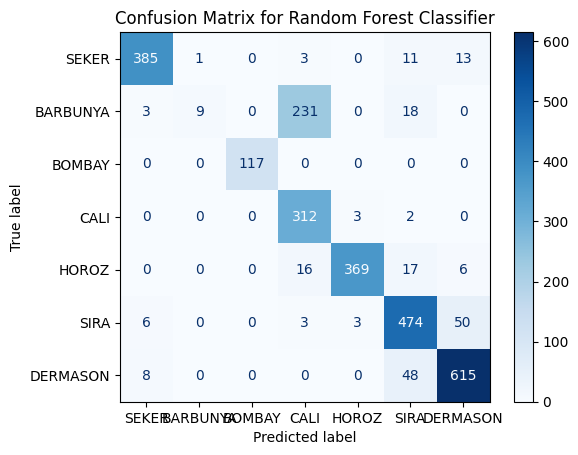

In [28]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(actual, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_mapping.keys())
plt.figure(figsize=(12, 8))
disp.plot(cmap='Blues')

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# # Feature Importance using a scikit-learn RandomForestClassifier for comparison
# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(train_data.drop('Class', axis=1), train_data['Class'])

# importances = rf_model.feature_importances_
# indices = np.argsort(importances)[::-1]

# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(range(len(importances)), importances[indices], align="center")
# plt.xticks(range(len(importances)), train_data.drop('Class', axis=1).columns[indices], rotation=90)
# plt.ylabel("Importance")
# plt.xlabel("Feature")
# plt.show()